# Retificador trifásico com ponto médio (Carga RC)

<center>
<img width="400" height="500" src="Figuras/13_controlado_meia_onda_rle.png">
</center>

In [1]:
from funcoes import *
%run funcoes.py
%matplotlib inline

/home/fbroering/Dropbox/2019-1/ELP/retificadores_python/funcoes.py:172: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I = integrate.quad(func, alpha, beta)
/home/fbroering/Dropbox/2019-1/ELP/retificadores_python/funcoes.py:178: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and 

# - Tensão na carga - # 
Vpk:	 70.71067811865476 
Vm: 	 69.94595314039375 
Vrms: 	 69.94750758872603
# - Corrente na fase - # 
Ipk: 	 12.968894594837725 
Im: 	 0.23315317749759834 
Irms: 	 1.424749460860904
# - Corrente no resistor - # 
Ipk: 	 0.7071063919163822 
Im: 	 0.6994595314039371 
Irms: 	 0.6994750758872601
# - Corrente no capacitor - # 
Ipk: 	 12.277456507884057 
Im: 	 0.0001814587422667073 
Irms: 	 2.366566596936832
# - Corrente de saída - # 
Ipk: 	 12.968894594837721 
Im: 	 0.6994741176299599 
Irms: 	 2.4674236211464464
# - Potências de uma fase - # 
Ppk:	 896.7187668558274 
P: 	 16.308846085037978 
S: 	 71.2374730430452
# - Fatores - # 
FP:	 0.22893633629007823 
THD V:	 0.0018850159739448925 
THD I:	 4.2396235203895385


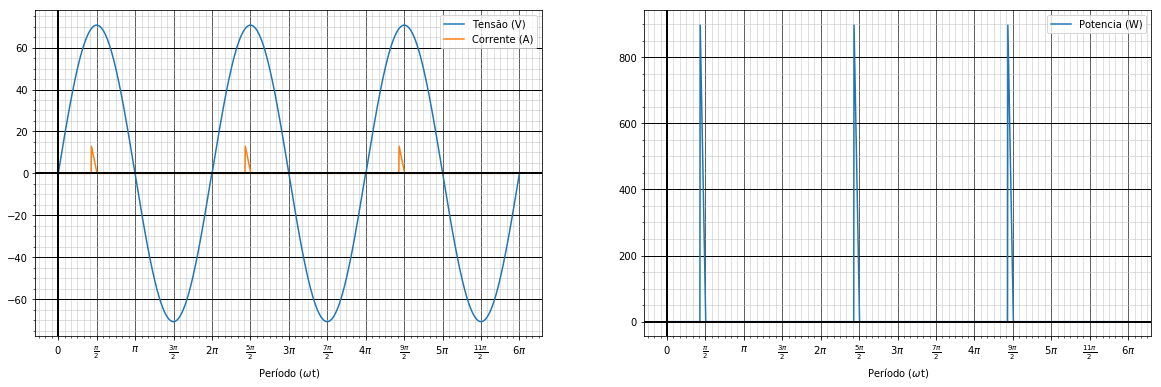

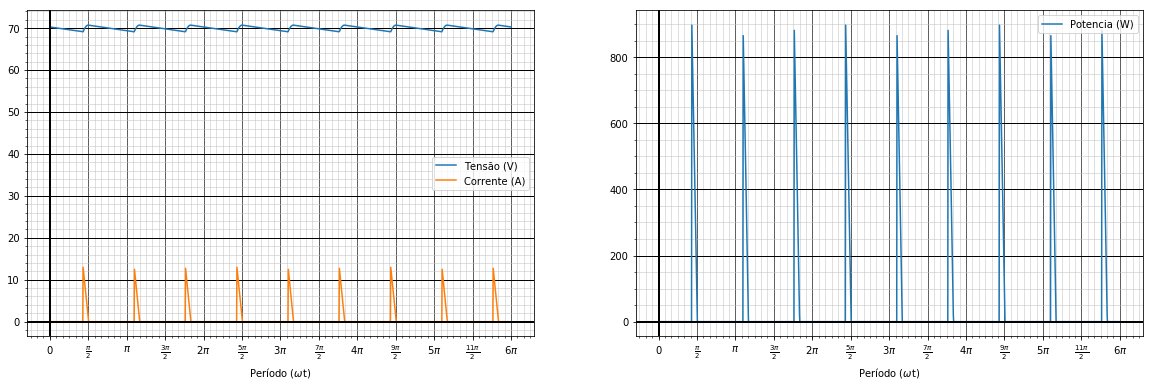

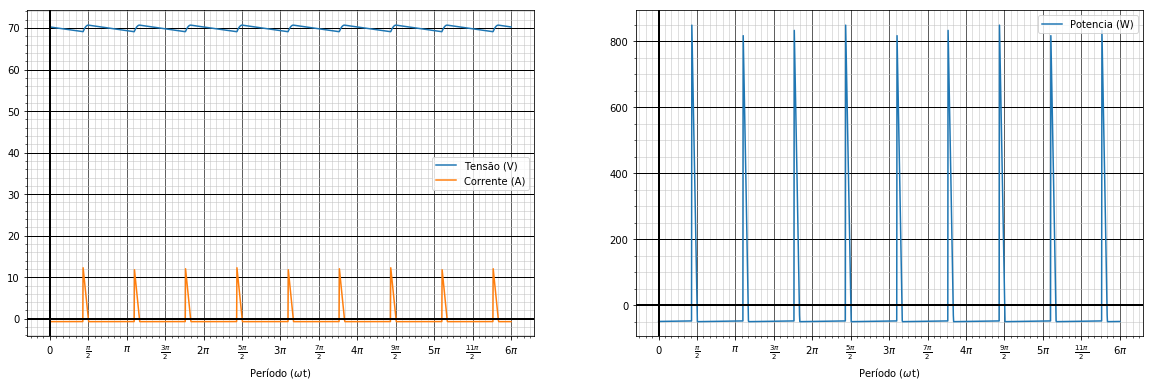

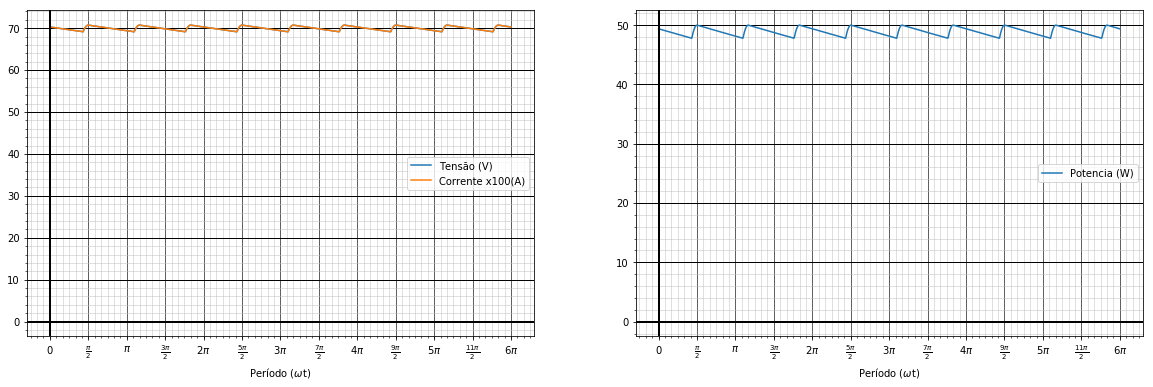

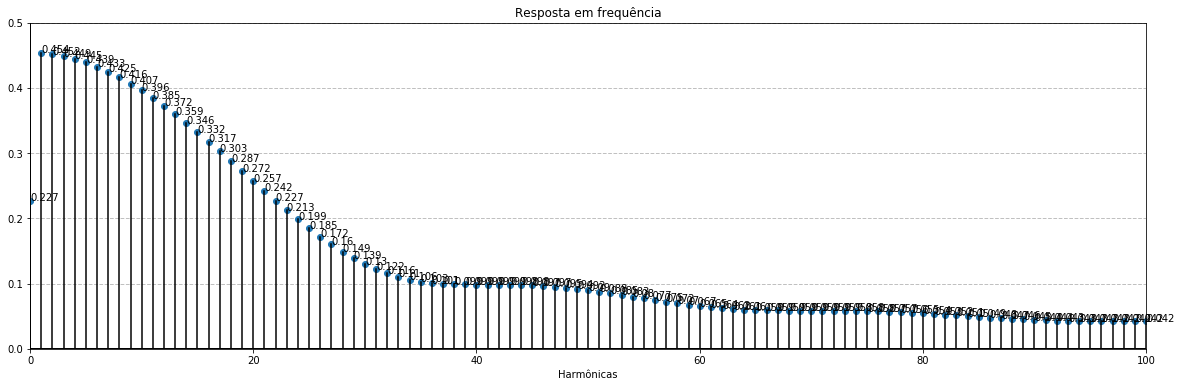

In [2]:
############# RETIFICADOR MEIA ONDA #############
#################### CARGA R ####################

V_pk = 50*sqrt(2)
R = 100
C = 2200e-6
Freq = 60

T = 2*pi

w = 2*pi*Freq

XC = 1 / (w * C)
XRC = complex(R,-XC)

Z = abs(XRC)

# Angulo que o diodo deixa de conduzir (Circuitos práticos = pi/2) 
teta = round(pi - atan(w*R*C), 5)

ab = calculo_ab(f'sin({teta})*exp(-({2*pi/3}+x-{teta})/{w*R*C}) - sin(x)', 0, modo='numpy')
a = ab[0]

# Tensão de saída do retificador trifásico com ponto médio
# Parcela inicial
func_vout = rampa_RC(V_pk, teta, w*R*C, 2*pi-4*pi/3) + f'*({degrau(0-eps, a)})'
# Parcela do Va
func_vout = func_vout + f'+ {V_pk}*sin(x)*({degrau(a, teta)})'
func_vout = func_vout + f'+ {rampa_RC(V_pk, teta, w*R*C)}*({degrau(teta, a+2*pi/3)})'
# Parcela do Vb
func_vout = func_vout + f'+ {V_pk}*sin(x - {2*pi/3})*({degrau(a+2*pi/3, teta+2*pi/3)})'
func_vout = func_vout + f'+ {rampa_RC(V_pk, teta, w*R*C, -2*pi/3)}*({degrau(teta+2*pi/3, a+4*pi/3)})'
# Parcela do Vc
func_vout = func_vout + f'+ {V_pk}*sin(x + {2*pi/3})*({degrau(a+4*pi/3, teta+4*pi/3)})'
func_vout = func_vout + f'+ {rampa_RC(V_pk, teta, w*R*C, -4*pi/3)}*({degrau(teta+4*pi/3, 2*pi)})'
# Calculos com base na forma de onda
Vout_media = calculo_medio(func_vout)
Vout_rms = calculo_rms(func_vout)

# Corrente de saída do retificador trifásico com ponto médio
# Parcela do Ia
func_iout = f'({w*C*V_pk}*cos(x) + (({func_vout})/{R}))*{degrau(a, teta)}'
# Parcela do Ib
func_iout = func_iout + f' + ({w*C*V_pk}*cos(x-{2*pi/3}) + (({func_vout})/{R}) )*{degrau(a+2*pi/3, teta+2*pi/3)}'
# Parcela do Ic
func_iout = func_iout + f' + ({w*C*V_pk}*cos(x-{4*pi/3}) + (({func_vout})/{R}) )*{degrau(a+4*pi/3, teta+4*pi/3)}'
# Calculos com base na forma de onda
Iout_media = calculo_medio(func_iout)
Iout_rms = calculo_rms(func_iout)
Iout_pk = calculo_pk(func_iout)

# Corrente no capacitor do retificador trifásico com ponto médio
func_ic = f'({func_iout}) - (({func_vout})/{R})'
Ic_media = calculo_medio(func_ic)
Ic_rms = calculo_rms(func_ic)
Ic_pk = calculo_pk(func_ic)

# Corrente no resistor do retificador trifásico com ponto médio
func_ir = f'(({func_vout})/{R})'
Ir_media = calculo_medio(func_ir)
Ir_rms = calculo_rms(func_ir)
Ir_pk = calculo_pk(func_ir)

# Tensão de entrada de uma fase do retificador trifásico com ponto médio
func_vin = f'{V_pk}*sin(x)'
Vin_media = calculo_medio(func_vin)
Vin_rms = calculo_rms(func_vin)

# Corrente de entrada de uma fase do retificador trifásico com ponto médio
func_iin = '(' + func_iout + f')*{degrau(a, teta)}'
Iin_media = calculo_medio(func_iin)
Iin_rms = calculo_rms(func_iin)
Iin_pk = calculo_pk(func_iin)

# Potencia ativa e aparente da entrada do retificador trifásico com ponto médio
func_p = '(' + func_vin + ')*(' + func_iin + ')'
P = calculo_medio(func_p)
S = Iin_rms*V_pk/sqrt(2)
P_pk = calculo_pk(func_p)

FP = P/S
thdV = calculo_thd(func_vin, T)
thdI = calculo_thd(func_iin, T)

print("# - Tensão na carga - #"       , "\nVpk:\t" , V_pk   , "\nVm: \t"  , Vout_media, "\nVrms: \t", Vout_rms)
print("# - Corrente na fase - #"      , "\nIpk: \t", Iin_pk , "\nIm: \t"  , Iin_media , "\nIrms: \t", Iin_rms)
print("# - Corrente no resistor - #"  , "\nIpk: \t", Ir_pk  , "\nIm: \t"  , Ir_media  , "\nIrms: \t", Ir_rms)
print("# - Corrente no capacitor - #" , "\nIpk: \t", Ic_pk  , "\nIm: \t"  , Ic_media  , "\nIrms: \t", Ic_rms)
print("# - Corrente de saída - #"     , "\nIpk: \t", Iout_pk, "\nIm: \t"  , Iout_media, "\nIrms: \t", Iout_rms)
print("# - Potências de uma fase - #" , "\nPpk:\t" , P_pk   , "\nP: \t"   , P         , "\nS: \t"   , S)
print("# - Fatores - #"               , "\nFP:\t"  , FP     , "\nTHD V:\t", thdV      , "\nTHD I:\t", thdI)

plot_info(func_vin, func_iin, xlim=(0, T))
plot_info(func_vout, func_iout, xlim=(0, T))
plot_info(func_vout, func_ic, xlim=(0, T))
plot_info(func_vout, func_ir, xlim=(0, T))

fig, (ax2) = plt.subplots(1, 1, figsize=(20, 6), sharey=True, sharex=True)
plot_fft(func_iin, ax2, T=2*np.pi, n_harmonicas = 100)